<a href="https://colab.research.google.com/github/adichat08/CNN-for-Bird-s-Eye-Human-Detection/blob/main/Neural_Network_Construction_for_Human_Identification_Algorithm_(Wildfire_Drone)_Development_Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
import PIL
import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
from tensorflow.keras import datasets, layers, models

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import shuffle

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet



from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import cv2

from google.colab import files

import requests, io, zipfile
import os



import os.path
from os import path

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime



# FIRE Dataset

This is a dataset of images of hazardous scenarios. They are the most specific to the task.

In [ ]:
import zipfile
with zipfile.ZipFile("FIRE_dataset.zip", "r") as zip_ref:
    zip_ref.extractall("foo_F")

In [ ]:
import cv2
import glob
FIRE_dataset = []
file_lst = []
path = "foo_F/fire_dataset/fire_images/*.png*"
for file in glob.glob(path):

  if '.' in file[36:39]:
   file_lst.append(file[31:])
   a= cv2.imread(file)
   res = cv2.resize(a, dsize=(125, 125), interpolation=cv2.INTER_CUBIC)
   FIRE_dataset.append(res)

  elif int(file[36:39])<301:
   file_lst.append(file[31:])
   a= cv2.imread(file)
   res = cv2.resize(a, dsize=(125, 125), interpolation=cv2.INTER_CUBIC)
   FIRE_dataset.append(res)



In [ ]:
FIRE_dataset = np.array(FIRE_dataset)

In [ ]:
print(len(FIRE_dataset))

300


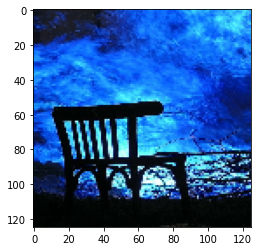

In [ ]:
plt.imshow(FIRE_dataset[24])

In [ ]:
file_lst

['fire.164.png',
 'fire.124.png',
 'fire.291.png',
 'fire.117.png',
 'fire.181.png',
 'fire.52.png',
 'fire.266.png',
 'fire.208.png',
 'fire.273.png',
 'fire.195.png',
 'fire.269.png',
 'fire.145.png',
 'fire.299.png',
 'fire.88.png',
 'fire.221.png',
 'fire.261.png',
 'fire.129.png',
 'fire.224.png',
 'fire.85.png',
 'fire.175.png',
 'fire.165.png',
 'fire.40.png',
 'fire.102.png',
 'fire.202.png',
 'fire.300.png',
 'fire.119.png',
 'fire.34.png',
 'fire.259.png',
 'fire.236.png',
 'fire.17.png',
 'fire.280.png',
 'fire.18.png',
 'fire.166.png',
 'fire.251.png',
 'fire.295.png',
 'fire.271.png',
 'fire.206.png',
 'fire.97.png',
 'fire.240.png',
 'fire.110.png',
 'fire.168.png',
 'fire.244.png',
 'fire.3.png',
 'fire.115.png',
 'fire.65.png',
 'fire.219.png',
 'fire.73.png',
 'fire.272.png',
 'fire.90.png',
 'fire.150.png',
 'fire.87.png',
 'fire.37.png',
 'fire.187.png',
 'fire.255.png',
 'fire.218.png',
 'fire.262.png',
 'fire.209.png',
 'fire.121.png',
 'fire.235.png',
 'fire.288.p

In [ ]:
human_in_fire_lst = ['fire.1.png','fire.100.png','fire.101.png', 'fire.103.png','fire.104.png', 'fire.105.png','fire.109.png', 'fire.112.png', 'fire.114.png', 'fire.117.png', 'fire.118.png', 'fire.120.png',
                     'fire.121.png', 'fire.122.png', 'fire.127.png', 'fire.130.png', 'fire.131.png', 'fire.133.png', 'fire.134.png', 'fire.136.png', 'fire.137.png', 'fire.139.png','fire.14.png', 'fire.14.png',
                     'fire.148.png', 'fire.149.png', 'fire.157.png', 'fire.158.png', 'fire.16.png', 'fire.161.png', 'fire.162.png', 'fire.163.png', 'fire.164.png', 'fire.166.png', 'fire.167.png', 'fire.168.png',
                     'fire.17.png', 'fire.170.png','fire.172.png', 'fire.173.png', 'fire.176.png', 'fire.177.png', 'fire.179.png', 'fire.181.png', 'fire.182.png', 'fire.183.png', 'fire.184.png', 'fire.187.png',
                     'fire.190.png', 'fire.193.png', 'fire.194.png', 'fire.195.png', 'fire.198.png', 'fire.199.png', 'fire.202.png', 'fire.203.png', 'fire.204.png', 'fire.205.png', 'fire.206.png', 'fire.21.png',
                     'fire.210.png', 'fire.211.png', 'fire.212.png', 'fire.215.png', 'fire.216.png', 'fire.217.png', 'fire.22.png', 'fire.223.png', 'fire.224.png', 'fire.225.png', 'fire.226.png', 'fire.227.png',
                     'fire.228.png', 'fire.229.png', 'fire.23.png', 'fire.233.png', 'fire.235.png', 'fire.236.png', 'fire.237.png', 'fire.238.png', 'fire.24.png', 'fire.247.png', 'fire.249.png', 'fire.25.png',
                     'fire.252.png', 'fire.258.png', 'fire.269.png', 'fire.272.png', 'fire.274.png', 'fire.279.png', 'fire.282.png', 'fire.283.png', 'fire.288.png', 'fire.293.png', 'fire.294.png', 'fire.296.png']

In [ ]:
len(human_in_fire_lst)

96

In [ ]:
file_lst.index('fire.1.png')

293

In [ ]:
humans_in_fire_y = []
for i in range(len(file_lst)):
  humans_in_fire_y.append(0)

In [ ]:
ind_lst = []
for i in human_in_fire_lst:
  ind_lst.append(file_lst.index(i))

In [ ]:
print(ind_lst)

[293, 193, 74, 94, 107, 64, 76, 251, 226, 3, 296, 220, 57, 79, 292, 194, 120, 230, 260, 277, 161, 68, 173, 173, 81, 245, 84, 229, 127, 139, 166, 171, 0, 32, 146, 40, 29, 151, 203, 62, 170, 88, 299, 4, 294, 208, 132, 52, 181, 227, 215, 9, 256, 131, 23, 209, 262, 234, 36, 105, 276, 240, 165, 219, 125, 298, 111, 223, 17, 113, 206, 136, 204, 160, 190, 83, 58, 28, 108, 77, 164, 295, 159, 270, 275, 92, 10, 47, 90, 258, 197, 257, 59, 195, 153, 178]


In [ ]:
for i in ind_lst:
  humans_in_fire_y[i] = 1

In [ ]:
humans_in_fire_y = np.array(humans_in_fire_y)

In [ ]:
FIRE_dataset = (FIRE_dataset / 255.0)

In [ ]:
from sklearn.model_selection import train_test_split
X = FIRE_dataset
y = humans_in_fire_y
FIRE_X_train, FIRE_X_test, FIRE_y_train, FIRE_y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Dataframe 1 Initialization

The section below initializes one part of the combined dataset. This dataset contains CCTV images of human figures and images without human figures present.

In [ ]:
import zipfile
with zipfile.ZipFile("human_identification_data.zip", "r") as zip_ref:
    zip_ref.extractall("foo")

In [ ]:
import glob
import cv2
dataset = []
files = glob.glob ("foo/human detection dataset/0/*.png")
for myFile in files:
  image = cv2.imread(myFile)
  res = cv2.resize(image, dsize=(125, 125), interpolation=cv2.INTER_CUBIC)
  dataset.append(res)
dataset = np.array(dataset)
print(dataset)

[[[[126 155 165]
   [125 154 169]
   [125 154 169]
   ...
   [203 231 229]
   [203 231 228]
   [203 231 228]]

  [[128 155 163]
   [124 154 169]
   [123 154 169]
   ...
   [177 207 205]
   [182 212 209]
   [200 228 225]]

  [[123 153 162]
   [120 151 166]
   [119 149 166]
   ...
   [212 240 239]
   [209 237 236]
   [202 232 231]]

  ...

  [[106 114 136]
   [104 112 134]
   [102 112 136]
   ...
   [109 102 117]
   [ 98  91 107]
   [124 117 133]]

  [[106 113 135]
   [104 112 134]
   [105 113 137]
   ...
   [140 135 147]
   [143 138 150]
   [121 118 133]]

  [[109 116 138]
   [108 115 137]
   [107 113 138]
   ...
   [148 144 153]
   [145 142 152]
   [145 142 156]]]


 [[[174 162 152]
   [183 172 161]
   [181 170 160]
   ...
   [186 174 157]
   [186 174 157]
   [185 172 156]]

  [[173 162 152]
   [181 172 161]
   [181 172 160]
   ...
   [186 174 157]
   [185 173 156]
   [185 173 156]]

  [[175 166 155]
   [179 170 159]
   [179 171 159]
   ...
   [186 174 157]
   [185 173 156]
   [185 173

In [ ]:
humans = []
for i in range(362):
  humans.append(0)

In [ ]:
humans_1 = []
for i in range(559):
  humans_1.append(1)

In [ ]:
dataset_1 = []
files = glob.glob ("foo/human detection dataset/1/*.png")
for myFile in files:
  image_1 = cv2.imread(myFile)
  res_1 = cv2.resize(image_1, dsize=(125, 125), interpolation=cv2.INTER_CUBIC)
  dataset_1.append(res_1)
dataset_1 = np.array(dataset_1)
print(dataset_1)

[[[[ 45  61  70]
   [ 62  69  78]
   [143 139 142]
   ...
   [ 91  91  92]
   [ 70  70  73]
   [ 68  71  75]]

  [[ 44  60  68]
   [ 93 100 113]
   [135 133 138]
   ...
   [ 91  91  90]
   [ 73  74  75]
   [ 71  74  77]]

  [[ 45  62  69]
   [ 71  78  87]
   [116 114 120]
   ...
   [ 91  90  88]
   [ 86  87  87]
   [ 70  73  75]]

  ...

  [[143 142 145]
   [140 140 140]
   [142 142 142]
   ...
   [146 139 140]
   [151 144 144]
   [143 135 134]]

  [[141 140 143]
   [139 139 139]
   [142 142 142]
   ...
   [147 139 140]
   [143 136 136]
   [150 141 140]]

  [[141 140 141]
   [142 141 140]
   [143 140 142]
   ...
   [151 143 144]
   [149 140 140]
   [141 133 131]]]


 [[[ 16  51  64]
   [142 178 193]
   [142 174 190]
   ...
   [ 53  63  66]
   [ 62  68  69]
   [ 73  81  81]]

  [[115 144 158]
   [ 48  77  86]
   [ 76 105 119]
   ...
   [ 79  84  87]
   [ 68  76  79]
   [ 73  80  83]]

  [[216 243 254]
   [ 14  38  51]
   [ 46  69  85]
   ...
   [ 77  86  89]
   [ 62  69  71]
   [ 73  81

In [ ]:
print(dataset_1.shape)

(559, 125, 125, 3)


In [ ]:
full_dataset = []
for i in dataset:
  full_dataset.append(i)
for j in dataset_1:
  full_dataset.append(j)

In [ ]:
full_dataset = np.array(full_dataset)

In [ ]:
print(full_dataset.shape)

(921, 125, 125, 3)


In [ ]:
humans_final = humans + humans_1

In [ ]:
from sklearn.model_selection import train_test_split
X = full_dataset
y = humans_final
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
print(X_train_full.shape)
print(X_train_full)

(736, 125, 125, 3)
[[[[ 85  76  62]
   [ 94  83  69]
   [110  98  84]
   ...
   [123 136 134]
   [120 134 132]
   [119 132 130]]

  [[ 94  85  71]
   [ 90  81  67]
   [ 91  80  66]
   ...
   [123 134 132]
   [121 132 130]
   [120 131 129]]

  [[ 89  81  68]
   [ 87  78  65]
   [ 90  78  66]
   ...
   [123 131 130]
   [121 129 128]
   [120 128 127]]

  ...

  [[179 132  45]
   [177 130  44]
   [180 135  47]
   ...
   [216 255 253]
   [216 255 253]
   [216 255 253]]

  [[188 142  53]
   [185 139  50]
   [184 140  51]
   ...
   [215 254 255]
   [215 254 255]
   [215 254 255]]

  [[194 148  60]
   [189 143  55]
   [188 143  54]
   ...
   [213 254 255]
   [213 254 255]
   [213 254 255]]]


 [[[125 167 184]
   [125 167 184]
   [125 168 182]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[127 170 186]
   [128 170 186]
   [128 170 184]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[130 171 188]
   [129 172 187]
   [131 172 186]
   ...
   [  0   0   0]
   [  0  

In [ ]:
X_train_full = np.array(X_train_full)
X_test = np.array(X_test)
y_train_full = np.array(y_train_full)
y_test = np.array(y_test)

In [ ]:
from sklearn.model_selection import train_test_split
X = X_train_full
y = y_train_full
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
len(X_train)

588

In [ ]:
len(X_val)

148

In [ ]:
len(X_test)

185

In [ ]:
del dataset
del dataset_1
del full_dataset

In [ ]:
# validation_dataframe = pd.DataFrame()
# validation_dataframe['Humans'] = y_val
# validation_dataframe["Image"] = [i for i in X_val]
# validation_dataframe

In [ ]:
# train_dataframe = pd.DataFrame()
# train_dataframe['Humans'] = y_train
# train_dataframe["Image"] = [i for i in X_train]
# train_dataframe

In [ ]:
# test_dataframe = pd.DataFrame()
# test_dataframe['Humans'] = y_test
# test_dataframe["Image"] = [i for i in X_test]
# test_dataframe

In [ ]:
# train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [ ]:
# validation_data = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [ ]:
# test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Dataframe 2 Initialization

This is the intialization of the second dataset that makes up the combined set. Only relevant images were used and others were removed.

In [ ]:
import zipfile
with zipfile.ZipFile("horses_or_humans.zip", "r") as zip_ref:
    zip_ref.extractall("foo_h")

In [ ]:
import glob
import cv2
dataset_h = []
files = glob.glob ("foo_h/horse-or-human/train/humans/*.png")
for myFile in files:
  image = cv2.imread(myFile)
  res = cv2.resize(image, dsize=(125, 125), interpolation=cv2.INTER_CUBIC)
  dataset_h.append(res)
dataset_h = np.array(dataset_h)
print(dataset_h)

[[[[ 29  25  21]
   [ 29  25  21]
   [ 29  25  21]
   ...
   [189 206 220]
   [181 199 211]
   [181 199 211]]

  [[ 30  26  21]
   [ 30  26  21]
   [ 30  26  21]
   ...
   [182 199 211]
   [180 198 210]
   [175 192 204]]

  [[ 30  26  21]
   [ 30  26  21]
   [ 30  26  21]
   ...
   [186 204 216]
   [185 202 214]
   [192 210 223]]

  ...

  [[130 146 156]
   [140 156 168]
   [147 164 175]
   ...
   [149 168 180]
   [142 160 172]
   [146 165 177]]

  [[136 152 163]
   [132 146 157]
   [143 160 171]
   ...
   [137 155 167]
   [135 152 166]
   [142 160 172]]

  [[138 153 165]
   [142 159 170]
   [144 161 172]
   ...
   [148 166 177]
   [138 156 168]
   [126 142 154]]]


 [[[119 121 128]
   [119 121 127]
   [120 121 126]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[119 121 129]
   [118 120 126]
   [121 121 126]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[116 117 124]
   [116 117 121]
   [119 118 122]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [ ]:
print(len(dataset_h))

527


In [ ]:
# humans_0_h = []
# for i in range(362):
#   humans_0_h.append(0)

In [ ]:
# humans_1_h = []
# for i in range(559):
#   humans_1_h.append(1)

In [ ]:
humans_h = []
for i in range(527):
  humans_h.append(1)
humans_h = np.array(humans_h)

In [ ]:
# full_dataset_h = list(full_dataset)
# for i in dataset_h:
#   full_dataset_h.append(i)

In [ ]:
# full_dataset_h = np.array(full_dataset_h)

In [ ]:
# print(full_dataset_h.shape)

In [ ]:
# humans_final_h = humans_0_h + humans_1_h + humans_h

In [ ]:
# print(len(humans_final_h))

In [ ]:
# from sklearn.model_selection import train_test_split
# X_h = full_dataset_h
# y_h = humans_final_h
# X_train_full_h, X_test_h, y_train_full_h, y_test_h = train_test_split(X_h,y_h, test_size=0.2, random_state=0)

In [ ]:
# print(X_train_full_h.shape)

In [ ]:
# X_train_full_h = np.array(X_train_full_h)
# X_test_h = np.array(X_test_h)
# y_train_full_h = np.array(y_train_full_h)
# y_test_h = np.array(y_test_h)

In [ ]:
# from sklearn.model_selection import train_test_split
# X = X_train_full
# y = y_train_full
# X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# validation_dataframe = pd.DataFrame()
# validation_dataframe['Humans'] = y_val
# validation_dataframe["Image"] = [i for i in X_val]
# validation_dataframe

In [ ]:
# train_dataframe = pd.DataFrame()
# train_dataframe['Humans'] = y_train
# train_dataframe["Image"] = [i for i in X_train]
# train_dataframe

In [ ]:
# test_dataframe = pd.DataFrame()
# test_dataframe['Humans'] = y_test
# test_dataframe["Image"] = [i for i in X_test]
# test_dataframe

In [ ]:
# train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [ ]:
# validation_data = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [ ]:
# test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# DataFrame 3 Initialization

This creates the a dataset of lansdcape images

In [ ]:
import zipfile
with zipfile.ZipFile("Landscape_Images.zip", "r") as zip_ref:
    zip_ref.extractall("foo_L")

In [ ]:
import cv2
import glob
landscapes_dataset = []
path = "foo_L/*.jpg*"
for file in glob.glob(path):
   a= cv2.imread(file)
   res = cv2.resize(a, dsize=(125, 125), interpolation=cv2.INTER_CUBIC)
   landscapes_dataset.append(res)

In [ ]:
landscapes_dataset = np.array(landscapes_dataset)

In [ ]:
landscapes_dataset.shape

(4319, 125, 125, 3)

In [ ]:
non_humans = []
for i in range(0,4319):
  non_humans.append(0)

In [ ]:
non_humans = np.array(non_humans)

In [ ]:
landscapes_dataset = (landscapes_dataset / 255.0)

# Image Augmentation

In [ ]:
X_train_full = (X_train_full / 255.0)
X_test = (X_test / 255.0)

In [ ]:
data_augmentation_1 = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.4),
     layers.experimental.preprocessing.RandomContrast((0.5,1.5)),
     layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3,1),width_factor=(-0.3,1))
     ])

In [ ]:
X_train_full_augmented = []
for i in X_train_full:
  X_train_full_augmented.append(data_augmentation_1(i))

In [ ]:
# X_train_full_augmented_2 = []
# for i in X_train_full:
#   X_train_full_augmented_2.append(data_augmentation_1(i))

In [ ]:
X_train_full_augmented = np.array(X_train_full_augmented)
# X_train_full_augmented_2 = np.array(X_train_full_augmented_2)

In [ ]:
# X_train_full_2 = np.vstack((X_train_full,X_train_full_augmented))
# X_train_full_2 = np.vstack((X_train_full_2,X_train_full_augmented_2))

In [ ]:
# y_train_augmented = list(y_train_full)
# y_train_augmented_2 = list(y_train_full)
# y_train_full_2 = list(y_train_full) + y_train_augmented + y_train_augmented_2

In [ ]:
# y_train_full_2 = np.array(y_train_full_2)
# len(y_train_full_2)

In [ ]:
# len(X_train_full_2)

In [ ]:
# del X_train_full_augmented
# del y_train_augmented
# del X_train_full_augmented_2
# del y_train_augmented_2

# Image Augmentation - Dataframe 2

In [ ]:
dataset_h = (dataset_h / 255.0)

In [ ]:
data_augmentation_1 = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.4),
     layers.experimental.preprocessing.RandomContrast((0.5,1.5)),
     layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3,1),width_factor=(-0.3,1))
     ])

In [ ]:
dataset_h_augmented = []
for i in dataset_h:
  dataset_h_augmented.append(data_augmentation_1(i))

In [ ]:
# dataset_h_augmented_2 = []
# for i in dataset_h:
#   dataset_h_augmented_2.append(data_augmentation_1(i))

In [ ]:
dataset_h_augmented = np.array(dataset_h_augmented)
# dataset_h_augmented_2 = np.array(dataset_h_augmented_2)

# Expanded Dataset Construction

In [ ]:
expanded_dataset = np.vstack((X_train_full, X_train_full_augmented))
del X_train_full, X_train_full_augmented
# expanded_dataset = np.vstack((expanded_dataset, X_train_full_augmented_2))
# del X_train_full_augmented_2
expanded_dataset = np.vstack((expanded_dataset, dataset_h))
del dataset_h
expanded_dataset = np.vstack((expanded_dataset, dataset_h_augmented))
del dataset_h_augmented
# expanded_dataset = np.vstack((expanded_dataset, dataset_h_augmented_2))
# del dataset_h_augmented_2
expanded_dataset = np.vstack((expanded_dataset,landscapes_dataset))
del landscapes_dataset

In [ ]:
# expanded_y = list(y_train_full) + list(y_train_full) + list(y_train_full) + list(humans_h) + list(humans_h) + list(humans_h)

In [ ]:
expanded_y = list(y_train_full) + list(y_train_full) + list(humans_h) + list(humans_h) + list(non_humans)

In [ ]:
expanded_y = np.array(expanded_y)

In [ ]:
print(expanded_dataset.shape)

(6845, 125, 125, 3)


In [ ]:
expanded_dataset, expanded_y = shuffle(expanded_dataset, expanded_y)

In [ ]:
X = expanded_dataset
y = expanded_y
expanded_X_train, expanded_X_test, expanded_y_train, expanded_y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
del expanded_dataset
del expanded_y
del X_train
del y_train
del y_train_full
del humans_h
del non_humans

# Models

In [ ]:
# imports specific to the model construction
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
# This is code to check GPU usage


# memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

# import psutil
# import humanize
# import os
# import GPUtil as GPU

# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm()

Implementation of basic VGG 16 architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Defining the VGG-16 model architecture
vgg_16 = keras.Sequential([
    # Convolutional Block 1
    # The first convolutional layer is the input layer and expects images of size 150x150 pixels with 3 color channels (RGB).
    # 64 filters are chosen to capture a variety of low-level features in the input images.
    # A 3x3 kernel size is commonly used in CNNs to capture spatial information.
    # 'Same' padding is chosen so that the spatial dimensions of the output feature maps match the dimensions of the input images.
    # ReLU activation is used as non-linearity, as opposed to other activation functions such as sigmoid. ReLU is used more commonly as it better addresses the vanising gradient problem and results in more sparse activation.
    layers.Conv2D(input_shape=(150, 150, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    # Max pooling is used to downsample the feature maps, reducing spatial dimensions and as a result, computational complexity.
    # A pool size of 2x2 and a stride of 2x2 are chosen to halve the spatial dimensions after each max-pooling layer.
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    # Convolutional Block 2
    # The number of filters is increased so that the model can now capture higher-level features (it can learn more complex patterns)
    # The same padding and ReLU activation function are used for consistency.
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    # Max pooling is still downsampling feature maps, while also preserving important features that the model identified.
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    # Convolutional Block 3
    # Increasing the number of filters to capture even more abstract features.
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),


    # Convolutional Block 4
    # Continuing the trend of increasing filters for deeper representation.
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    # Convolutional Block 5
    # Keeping the number of filters consistent for the final convolutional layers.
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    # Fully Connected Layers
    # Flattening the 3D convolutional outputs into a 1D vector for input to the fully connected layers.
    # Dense layers with 4096 units are chosen to preserve the high-level feature representations acquired in the deeper layers.
    # ReLU activation used for the aformentioned reasons.

    layers.Flatten(),
    layers.Dense(units=4096, activation="relu"),
    layers.Dense(units=4096, activation="relu"),

    # Output Layer
    # The output layer consists of 2 units, representing the two classes (human target identified or not).
    # Softmax activation is chosen for the output layer to produce class probabilities.
    layers.Dense(units=2, activation="softmax")
])


In [ ]:
from tensorflow.keras.optimizers import Adam
# Adam is a common optimizer and a learning rate of 0.001 is generally shown to be stable and work well for a variety of tasks. This is an intial hyperparameter choice.
opt = Adam(learning_rate=0.001)

In [ ]:
vgg_16.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
vgg_16.summary()

Implementation of modified ResNet50 architecture

In [ ]:
# Below is an explanation for the general structure of the model:

# Convolutional Block and Identity Block Structure:
# The ResNet architecture is based on the concept of residual learning, where the main path (through convolutional layers) is augmented with a shortcut connection (skipping layers).
# Both convolutional_block and identity_block functions are fundamental building blocks of ResNet, each consisting of multiple convolutional layers, followed by batch normalization and ReLU activation.

# Number of Filters:
# The number of filters in each convolutional layer is carefully chosen to balance model complexity and representational capacity.
# For example, in the convolutional_block, the number of filters gradually increases from F1 to F3, capturing more abstract features as the network progresses.

# Kernel Size and Padding:
# Kernel size of 1x1, 3x3, and occasionally 7x7 is used in different layers to capture different levels of spatial information.
# Same padding is used in most convolutional layers to preserve spatial dimensions.

# Striding:
# Striding is employed in the convolutional_block to reduce spatial dimensions (e.g., from 56x56 to 28x28) when transitioning between different stages of the network.

# Pooling:
# Average pooling is applied at the end of the network to aggregate spatial information and reduce spatial dimensions before the final output layer.

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block in ResNet50.

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- list of integers, defining the number of filters in the CONV layers
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    # Define name basis for the layers
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Add shortcut value to main path and pass it through a ReLU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block in ResNet50.

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    # Define name basis for the layers
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Shortcut path
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Add shortcut value to main path and pass it through a ReLU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet50(input_shape=(224, 224, 3)):
    """
    Implementation of the ResNet50 architecture.

    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define input with zero padding
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # Average pooling layer
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model


In [ ]:
base_model = ResNet50(input_shape=(150, 150, 3))

Transfer learning implementation attempt

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model.summary()

In [ ]:
base_model.load_weights('/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(expanded_dataset, expanded_y, epochs=20, batch_size = 8, validation_split = 0.2, verbose = 1, callbacks = [es])

Below are tests for basic CNNs

In [ ]:
# Testing a CNN

cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Testing a CNN

cnn_2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Testing a CNN

cnn_3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(125, 125, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Testing a CNN

cnn_3_1 = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(125, 125, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Testing a CNN

cnn_3_2 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(125, 125, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Testing a CNN

cnn_4 = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(7, 7), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Testing a CNN

cnn_5 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:

cnn_4 = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_3_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_3_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
vgg_16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fitting models

In [ ]:
history_c3_1_4 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=200, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1_3 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=500, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1_3 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=15, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1_4 = cnn_3.fit(FIRE_X_train, FIRE_y_train, epochs=15, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1_2 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 4, validation_split = 0.2)

In [ ]:
history_c3_1_1 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 16, validation_split = 0.2)

In [ ]:
history_c3_1_1 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 1, validation_split = 0.2)

In [ ]:
history_c3_2 = cnn_3_2.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1 = cnn_3_1.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 8, validation_split = 0.2)

In [ ]:
history_c3_1 = cnn_3.fit(expanded_X_train, expanded_y_train, epochs=50, batch_size = 4, validation_split = 0.2)

In [ ]:
history_104 = cnn_2.fit(X_train_full, y_train_full, epochs=500, batch_size = 8, validation_split = 0.2)

In [ ]:
history_104 = cnn_2.fit(expanded_dataset, expanded_y, epochs=20, batch_size = 4, validation_split = 0.2)

In [ ]:
history_104 = cnn_2.fit(expanded_dataset, expanded_y, epochs=20, batch_size = 8, validation_split = 0.3)

In [ ]:
history_104 = cnn_2.fit(expanded_dataset, expanded_y, epochs=20, batch_size = 8, validation_split = 0.2)

In [ ]:
history_104 = cnn_3.fit(expanded_dataset, expanded_y, epochs=20, batch_size = 8, validation_split = 0.2)

In [ ]:
history_104 = cnn_4.fit(expanded_dataset, expanded_y, epochs=20, batch_size = 8, validation_split = 0.2)

In [ ]:
history_104 = cnn_4.fit(expanded_dataset, expanded_y, epochs=100, batch_size = 8, validation_split = 0.2)

In [ ]:
history_104 = cnn_4.fit(expanded_dataset, expanded_y, epochs=50, batch_size = 8, validation_split = 0.2)

Displaying graphs

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_104.history['accuracy'])
plt.plot(history_104.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history_104.history['loss'])
plt.plot(history_104.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

Checking results

In [ ]:
cnn_3.evaluate(X_test,y_test)

In [ ]:
cnn_3_1.evaluate(X_test,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(X_test ,y_test)

In [ ]:
cnn_4.evaluate(X_test ,y_test)

In [ ]:
cnn_4.evaluate(X_test ,y_test)

In [ ]:
cnn_4.evaluate(X_test ,y_test)

In [ ]:
cnn_2.evaluate(X_test ,y_test)

In [ ]:
model.evaluate(X_test ,y_test)

In [ ]:
vgg_16.evaluate(X_test ,y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3_1.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3_2.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(expanded_X_test ,expanded_y_test)

In [ ]:
cnn_3.evaluate(FIRE_dataset, humans_in_fire_y)

In [ ]:
cnn_3.evaluate(FIRE_X_test, FIRE_y_test)

In [ ]:
y_pred_cnn = cnn_3.predict(X_test)

In [ ]:
y_pred_cnn_1 = cnn_3.predict(FIRE_X_test)

In [ ]:
y_classes_cnn = [np.argmax(element) for element in y_pred_cnn_1]

In [ ]:
print(list(y_test[:10]))
print(y_classes_cnn[:10])

In [ ]:
print("Classification Report: \n", classification_report(FIRE_y_test, y_classes_cnn))

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes_cnn))

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes_cnn))

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes_cnn))

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes_cnn))

# Playground

In [ ]:
train_lst = []
for i in range(len(X_train)):
  train_lst.append([X_train[i],y_train[i]])

In [ ]:
validation_lst = []
for i in range(len(X_val)):
  train_lst.append([X_val[i],y_val[i]])

In [ ]:
print(len(train_lst))

736


In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(300,300,3),
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.run_eagerly = True

NameError: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
train_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
history_1 = base_model.fit(train_data,epochs=10,validation_data=validation_data,batch_size=1)

ValueError: ignored

In [ ]:
history = model.fit(train_data,epochs=10,validation_data=validation_data,batch_size=1)

ValueError: ignored

In [ ]:
type(validation_data)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
print(len(validation_data))

148


In [ ]:
for i in validation_data:
  print(i)

Streaming output truncated to the last 5000 lines.
(<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[147, 149, 153],
        [150, 152, 157],
        [152, 154, 159],
        ...,
        [168, 172, 166],
        [169, 175, 167],
        [174, 179, 172]],

       [[132, 132, 137],
        [132, 133, 139],
        [132, 134, 139],
        ...,
        [160, 165, 158],
        [160, 166, 158],
        [163, 168, 161]],

       [[119, 119, 123],
        [113, 114, 120],
        [108, 110, 117],
        ...,
        [154, 161, 152],
        [152, 159, 150],
        [153, 159, 152]],

       ...,

       [[159, 182, 182],
        [157, 180, 181],
        [155, 178, 179],
        ...,
        [ 26,  20,  21],
        [ 25,  19,  20],
        [ 25,  20,  19]],

       [[159, 182, 181],
        [160, 181, 182],
        [159, 182, 182],
        ...,
        [ 24,  20,  20],
        [ 24,  19,  19],
        [ 24,  19,  19]],

       [[159, 182, 182],
        [161, 181, 182],
       

In [ ]:
sub = X_train[0]
print(sub.shape)
shape_1 =  (None,) + (300,300,3)

(300, 300, 3)


In [ ]:
print(shape_1)

(None, 300, 300, 3)


In [ ]:
type(shape_1)

tuple

In [ ]:
sub.reshape(shape_1)

TypeError: ignored

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
 x = tf.placeholder(tf.float32, shape=[None, 300, 300,3], name='x')

In [ ]:
print(x)

Tensor("x:0", shape=(?, 300, 300, 3), dtype=float32)


In [ ]:
train_image = X_train[0][None,:,:,:]

In [ ]:
train_image.shape

(1, 300, 300, 3)

In [ ]:
train_images2 = X_train[np.newaxis is None,:,:,:]

In [ ]:
train_images2[0].shape

(588, 300, 300, 3)

In [ ]:
X_train_real = X_train[0]

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [ ]:
len(files)

559

1


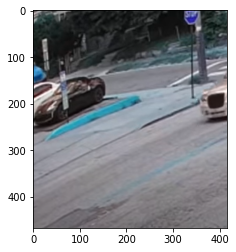

In [ ]:
plt.imshow(X_train_real[0])
print(y_train[735])
plt.show()

In [ ]:
img = tf.keras.preprocessing.image.load_img(files[0], target_size=(224, 224))

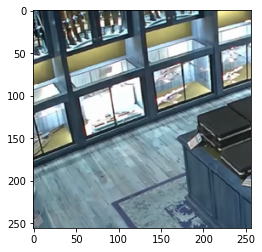

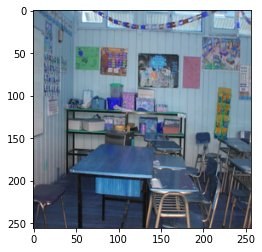

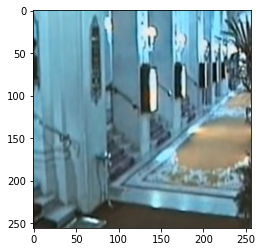

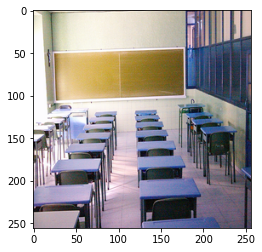

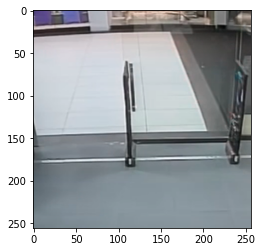

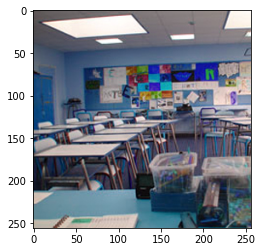

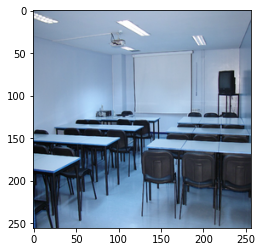

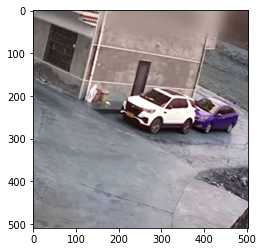

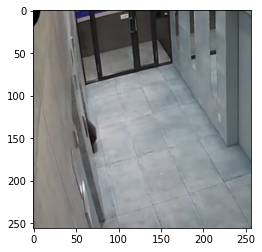

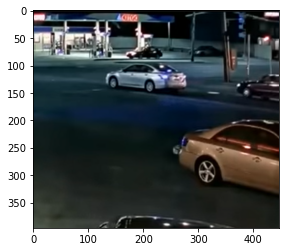

In [ ]:
for i in range(0,10):
  plt.imshow(dataset[i])
  plt.show()

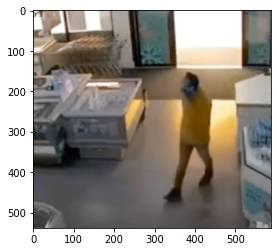

In [ ]:
plt.imshow(cv2.imread(files[0]))
plt.show()

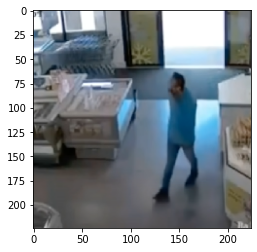

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
cv2.flip(X_train_real[0],1)

In [ ]:
np.array(img)



---



In [ ]:
img_1 = tf.keras.preprocessing.image.load_img(files[1], target_size=(224, 224))

TypeError: ignored

In [ ]:
type(img_1)

PIL.Image.Image

In [ ]:
np.array(img_1)

array([[[176, 169, 148],
        [175, 169, 146],
        [175, 169, 146],
        ...,
        [134, 130, 128],
        [208, 205, 204],
        [215, 212, 210]],

       [[178, 168, 147],
        [176, 169, 146],
        [176, 169, 146],
        ...,
        [141, 138, 136],
        [211, 209, 207],
        [212, 210, 208]],

       [[177, 167, 144],
        [176, 168, 143],
        [175, 168, 142],
        ...,
        [151, 148, 146],
        [213, 211, 210],
        [210, 208, 206]],

       ...,

       [[ 93,  91,  81],
        [ 93,  91,  82],
        [ 93,  91,  84],
        ...,
        [ 94,  92,  84],
        [ 94,  93,  84],
        [ 95,  93,  85]],

       [[ 94,  93,  81],
        [ 94,  92,  83],
        [ 93,  91,  83],
        ...,
        [ 94,  92,  84],
        [ 94,  92,  84],
        [ 94,  93,  84]],

       [[ 94,  93,  81],
        [ 93,  91,  82],
        [ 93,  91,  82],
        ...,
        [ 94,  92,  84],
        [ 94,  92,  84],
        [ 94,  92,  84]]

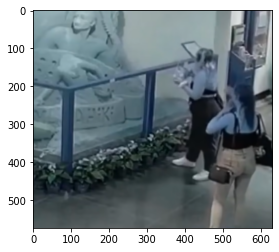

In [ ]:
plt.imshow(cv2.imread(files[1]))
plt.show()

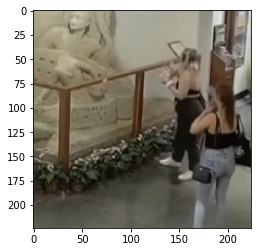

In [ ]:
plt.imshow(img_1)
plt.show()

In [ ]:
from PIL import Image, ImageOps
fixed_image = ImageOps.exif_transpose(img_1)

In [ ]:
type(fixed_image)

PIL.Image.Image

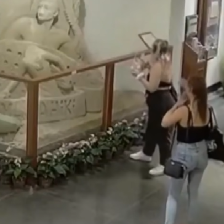

In [ ]:
fixed_image

In [ ]:
for i in files:
  plt.imshow(cv2.imread(i))
  plt.show()

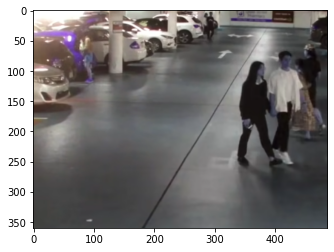

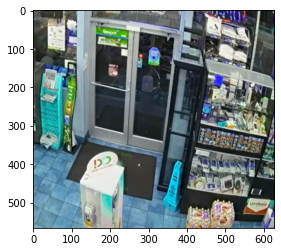

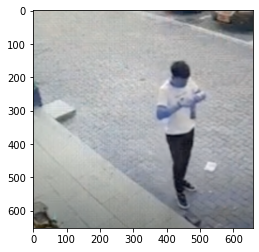

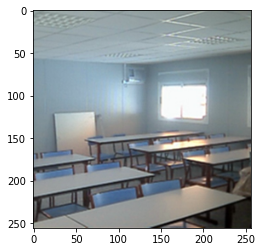

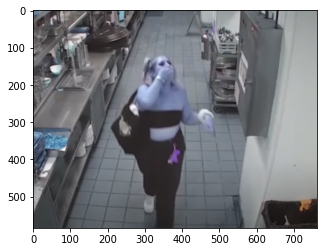

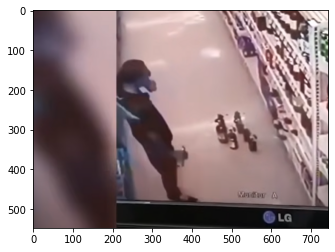

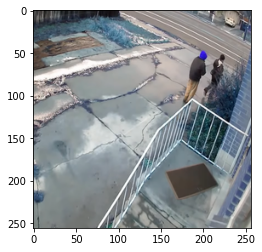

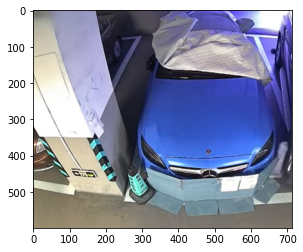

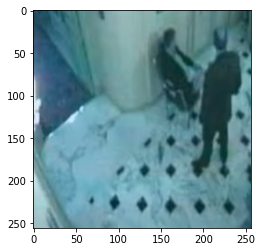

In [ ]:
for i in range(1,10):
  plt.imshow(X_train_real[i])
  plt.show()

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file,
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

In [ ]:
image_id = os.listdir('foo/human detection dataset/0')[0]
image = load_image(os.path.join('foo/human detection dataset/0',image_id))
print(f'shape: {image.shape}')
print(f'type: {type(image)}')
model.predict(image)

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


array([[1.42043718e-04, 1.12611651e-05, 4.62155294e-05, 1.03467246e-05,
        1.65820157e-03, 2.28094723e-04, 7.18801894e-05, 1.33657604e-05,
        6.63321043e-06, 1.39728218e-06, 7.05031744e-06, 6.32470801e-07,
        8.73305112e-07, 1.18246657e-08, 1.69510452e-06, 2.39539968e-05,
        1.33227400e-06, 1.44534249e-06, 1.82450367e-06, 6.45673197e-07,
        7.97022494e-07, 4.59616984e-07, 9.06603532e-07, 3.63301183e-06,
        4.08886166e-07, 1.72047294e-07, 1.16323808e-05, 1.21034191e-06,
        1.35714373e-07, 8.30313354e-07, 5.55547967e-06, 2.29062465e-07,
        1.20693107e-06, 1.22579377e-06, 5.57421845e-06, 1.01357678e-07,
        2.16718490e-06, 7.03505350e-07, 2.49216839e-07, 1.76695175e-06,
        1.65684909e-07, 1.61740672e-07, 1.88956278e-07, 3.14676163e-06,
        1.35671655e-07, 4.16775219e-06, 1.80115833e-07, 1.54102020e-06,
        5.18861270e-06, 2.45514620e-05, 1.63351433e-05, 6.40152954e-04,
        2.27090209e-06, 1.20761388e-06, 1.78131472e-06, 2.144837

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3),
  include_top=False,
  pooling='avg'
)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
x = Dropout(rate=0.4)(model.output)
x = Dense(3)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy'
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.applications import mobilenet as _mobilenet

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory(
    './foo/human detection dataset',
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
)

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory(
    './foo/human detection dataset',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
)

Found 830 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [ ]:
pip install keras_tqdm

In [ ]:
from keras_tqdm import TQDMNotebookCallback

batch_size = 32

history = model.fit_generator(
    generator=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)],
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/10


InvalidArgumentError: ignored